# Install packages

In [1]:
# !pip install neo
# !pip install matplotlib_scalebar
# !pip install ffmpeg
# !pip install Ipython --upgrade
# %load_ext autoreload
# %autoreload 2

ModuleNotFoundError: No module named 'google'

In [ ]:
## if using google drive

# from google.colab import drive # import drive from google colab
# drive.mount("/content/drive") 
# %cd /content/drive/MyDrive/ff_repo/Multifirefly-Project

# Import packages

In [1]:

%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_functions
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_scatterplot, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.neural_analysis_by_topic.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.neural_analysis_by_topic.planning_and_neural import planning_neural_class, planning_neural_utils
from planning_analysis.only_cur_ff import only_cur_ff_utils, only_cur_ff_class, only_cur_ff_utils
from planning_analysis.plan_factors import plan_factors_utils, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.agent_analysis import compare_monkey_and_agent_utils, agent_plan_factors_class, agent_plan_factors_x_sess_class
from planning_analysis.plan_factors import test_vs_control_utils
from planning_analysis.variations_of_factors_vs_results import make_variations_utils, plot_variations_utils, process_variations_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from planning_analysis.show_planning.get_stops_near_ff import find_stops_near_ff_class, find_stops_near_ff_utils, plot_stops_near_ff_class, plot_stops_near_ff_utils, plot_monkey_heading_helper_class, stops_near_ff_based_on_ref_class
from machine_learning.ml_methods import ml_methods_class, prep_ml_data_utils
from eye_position_analysis import eye_positions

from importlib import reload
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101



Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.


In [2]:
data_item = None
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

# get info from one session

In [59]:
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"
pf = plan_factors_class.PlanFactors(raw_data_folder_path=raw_data_folder_path,
                                    optimal_arc_type='opt_arc_stop_closest')
                                    #optimal_arc_type = 'norm_opt_arc')

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


In [56]:
gc.collect()

16255

In [ ]:
exists_ok = True
pf.make_plan_x_and_y_for_both_test_and_ctrl(plan_x_exists_ok=False, 
                                            plan_y_exists_ok=exists_ok,
                                            already_made_ok=exists_ok, 
                                            heading_info_df_exists_ok=exists_ok,
                                            ref_point_mode='time after cur ff visible', 
                                            ref_point_value=0.1,
                                            stops_near_ff_df_exists_ok=True,
                                            # ref_point_mode='distance', 
                                            # ref_point_value=-150,                                           
                                            )


Successfully retrieved plan_y_test (stop_0_1_window_-50cm_0cm)
Making new: plan_x_test (stop_0_1_window_-50cm_0cm)
Made plan_x_test and saved to all_monkey_data/planning/monkey_Bruno/data_0328/plan_x_df/opt_arc_stop_closest/test/stop_0_1_window_-50cm_0cm
Successfully retrieved plan_y_ctrl (stop_0_1_window_-50cm_0cm)
Making new: plan_x_ctrl (stop_0_1_window_-50cm_0cm)


In [52]:
pf.plan_x_ctrl.shape

(0, 331)

In [6]:
# test_heading_info_df = pf.test_heading_info_df.copy()
# ctrl_heading_info_df = pf.ctrl_heading_info_df.copy()
# test_heading_info_df = plan_factors_utils.process_heading_info_df(test_heading_info_df)
# ctrl_heading_info_df = plan_factors_utils.process_heading_info_df(ctrl_heading_info_df)
# df = make_variations_utils.make_temp_median_info_func(test_heading_info_df, ctrl_heading_info_df)

# CDF

Looking back at this after some time, I believe the purpose of this section is to show that, in test cases, the parameter of interest (such as diff_in_abs_d_heading) tends to be more skewed to the right compared to control cases. This is important because higher values of this parameter provide stronger evidence of planning behavior.

In [7]:
ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro')
ps.initialize_monkey_sessions_df_for_one_monkey()
ps.get_combd_heading_df_x_sessions_across_sessions(
                        ref_point_mode='time after cur ff visible', ref_point_value=0.1,
                        save_data=False)


Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/control/Schro_stop_0_1
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/control/stop_0_1_window_-50cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/test/Schro_stop_0_1
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/test/stop_0_1_window_-50cm_0cm


In [8]:
ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno')
ps.initialize_monkey_sessions_df_for_one_monkey()
ps.get_combd_heading_df_x_sessions_across_sessions(
                        ref_point_mode='time after cur ff visible', ref_point_value=0.1,
                        save_data=False)


Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/control/Bruno_stop_0_1
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/control/stop_0_1_window_-50cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/test/Bruno_stop_0_1
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/test/stop_0_1_window_-50cm_0cm


In [9]:
test_heading_info_df = ps.combd_heading_df_x_sessions_test.copy()
ctrl_heading_info_df = ps.combd_heading_df_x_sessions_ctrl.copy()
test_heading_info_df = plan_factors_utils.process_heading_info_df(test_heading_info_df)
ctrl_heading_info_df = plan_factors_utils.process_heading_info_df(ctrl_heading_info_df)

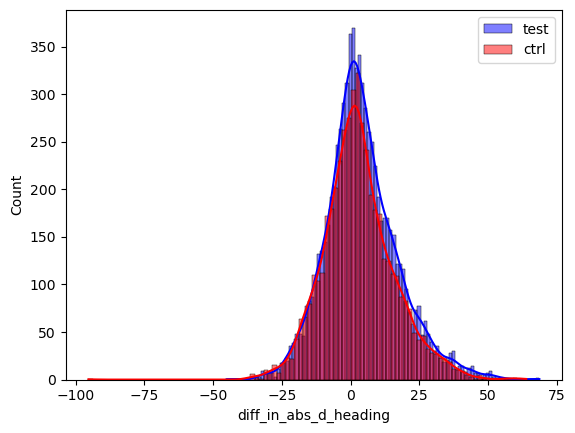

In [10]:
# make histplot first
column = 'diff_in_abs_d_heading'
sns.histplot(data=test_heading_info_df[column], bins=100, label='test', color='blue', kde=True)
sns.histplot(data=ctrl_heading_info_df[column], bins=100, label='ctrl', color='red', kde=True)
plt.legend()
plt.show()

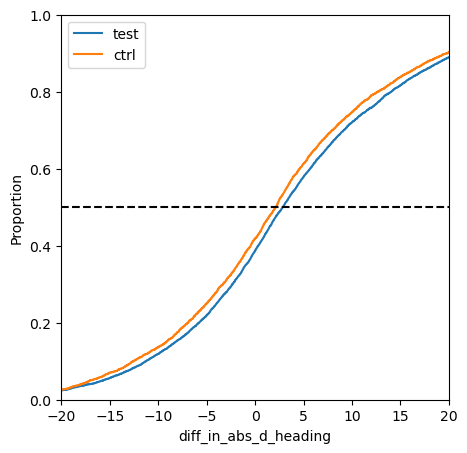

In [11]:
# plot a cumulative density distribution of test_heading_info_df['diff_in_abs_d_heading']
def plot_cdf(test_heading_info_df, ctrl_heading_info_df, column='diff_in_abs_d_heading', xlim=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.ecdfplot(data=test_heading_info_df[column], ax=ax, label='test')
    sns.ecdfplot(data=ctrl_heading_info_df[column], ax=ax, label='ctrl')
    ax.axhline(y=0.5, color='black', linestyle='--')
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.legend()
    plt.show()


plot_cdf(test_heading_info_df, ctrl_heading_info_df, column='diff_in_abs_d_heading', xlim=[-20, 20])

In [12]:
ctrl_heading_info_df.columns

Index(['Unnamed: 0.1_x', 'Unnamed: 0_x', 'stop_point_index', 'stop_x',
       'stop_y', 'stop_time', 'cur_ff_index', 'cur_ff_x', 'cur_ff_y',
       'cur_ff_cluster_50_size', 'point_index_before_stop',
       'monkey_angle_before_stop', 'next_stop_point_index', 'next_stop_time',
       'cum_distance_between_two_stops', 'curv_range', 'curv_iqr',
       'nxt_ff_index', 'nxt_ff_x', 'nxt_ff_y', 'NXT_time_ff_last_seen_bbas',
       'NXT_time_ff_last_seen_bsans', 'nxt_ff_last_flash_time_bbas',
       'nxt_ff_last_flash_time_bsans', 'nxt_ff_cluster_last_seen_time_bbas',
       'nxt_ff_cluster_last_seen_time_bsans',
       'nxt_ff_cluster_last_flash_time_bbas',
       'nxt_ff_cluster_last_flash_time_bsans', 'mx_before_stop',
       'my_before_stop', 'cur_arc_end_heading', 'nxt_arc_end_heading',
       'cur_arc_end_x', 'cur_arc_end_y', 'd_heading_of_traj',
       'cur_d_heading_of_arc', 'ref_monkey_angle', 'ref_curv_of_traj',
       'nxt_d_heading_of_arc', 'angle_from_m_before_stop_to_cur_ff',
 

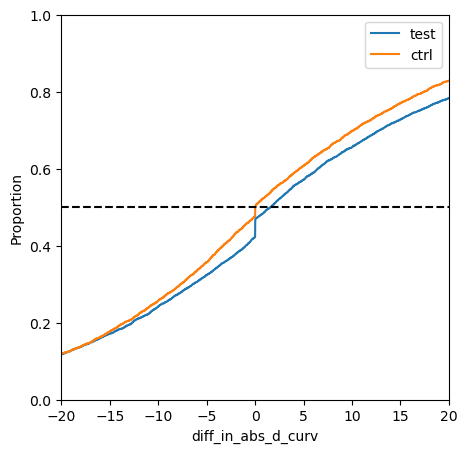

In [13]:
plot_cdf(test_heading_info_df, ctrl_heading_info_df, column='diff_in_abs_d_curv', xlim=[-20, 20])

# Plan factors class

## get data

### monkey across sessions

In [14]:
ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno')
ps.initialize_monkey_sessions_df_for_one_monkey()
# ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
#                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
                                        heading_info_df_exists_ok=True,
                                        stops_near_ff_df_exists_ok=True, 
                                        ref_point_mode='time after cur ff visible', ref_point_value=0.1)

combd_plan_y_tc = ps.combd_plan_y_tc.copy().reset_index(drop=True)
combd_plan_x_tc = ps.combd_plan_x_tc.copy().reset_index(drop=True)
# pf.plan_x_tc = combd_plan_x_tc.copy()
# pf.plan_y_tc = combd_plan_y_tc.copy()

### re-calculate planning data for both monkeys

In [15]:
# # to re-calculate planning data
# exists_ok = True
# curv_traj_window_before_stop=[-50, 0]

# for optimal_arc_type in ['norm_opt_arc', 'opt_arc_stop_first_vis_bdry', 'opt_arc_stop_closest']:
#     #optimal_arc_type='norm_opt_arc' # options are: norm_opt_arc, opt_arc_stop_first_vis_bdry, opt_arc_stop_closest,
    


#     ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#     variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                 monkey_name='monkey_Schro')

#     for index, row in variations_list.iterrows():
#         ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro', 
#                                                                 optimal_arc_type=optimal_arc_type)
#         ps.initialize_monkey_sessions_df_for_one_monkey()
#         # ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
#         #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#         print(row)
#         ps.get_plan_x_and_plan_y_across_sessions(exists_ok=False, plan_x_exists_ok=exists_ok, plan_y_exists_ok=exists_ok,
#                                                 heading_info_df_exists_ok=exists_ok,
#                                                 stops_near_ff_df_exists_ok=exists_ok, 
#                                                 ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])




#     # to re-calculate planning data for a monkey
#     ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#     variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                 monkey_name='monkey_Bruno')

#     for index, row in variations_list.iterrows():
#         ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno', 
#                                                                 optimal_arc_type=optimal_arc_type)
#         ps.initialize_monkey_sessions_df_for_one_monkey()
#         # ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
#         #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#         print(row)
#         ps.get_plan_x_and_plan_y_across_sessions(exists_ok=False, plan_x_exists_ok=exists_ok, plan_y_exists_ok=exists_ok,
#                                                 heading_info_df_exists_ok=exists_ok,
#                                                 stops_near_ff_df_exists_ok=exists_ok, 
#                                                 ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])



### re-calculate heading_info

In [16]:
# for curv_traj_window_before_stop in [[-100, 0], [-50, -5]]:
#     # [-75, -0], [-50, 0], [-25, 0], 
#     for optimal_arc_type in ['norm_opt_arc', 'opt_arc_stop_closest', 'opt_arc_stop_first_vis_bdry']:
#         # to re-calculate planning data for a monkey
#         exists_ok = True
#         # optimal_arc_type='norm_opt_arc' # options are: norm_opt_arc, opt_arc_stop_first_vis_bdry, opt_arc_stop_closest,
        


#         ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#         variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                     monkey_name='monkey_Schro')

#         for index, row in variations_list.iterrows():
#             ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro',
#                                                                     optimal_arc_type=optimal_arc_type)
#             ps.initialize_monkey_sessions_df_for_one_monkey()
#             # ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
#             #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#             print(row)

#             ps.get_combd_heading_df_x_sessions_across_sessions(exists_ok=exists_ok,
#                                                     heading_info_df_exists_ok=exists_ok,
#                                                     stops_near_ff_df_exists_ok=exists_ok, 
#                                                     curv_traj_window_before_stop=curv_traj_window_before_stop,
#                                                     ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])

#         # to re-calculate planning data for a monkey
#         ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#         variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                     monkey_name='monkey_Bruno')

#         for index, row in variations_list.iterrows():
#             ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno',
#                                                                     optimal_arc_type=optimal_arc_type)                                                             
#             ps.initialize_monkey_sessions_df_for_one_monkey()
#             # ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
#             #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#             print(row)

#             ps.get_combd_heading_df_x_sessions_across_sessions(exists_ok=exists_ok,
#                                                     heading_info_df_exists_ok=exists_ok,
#                                                     stops_near_ff_df_exists_ok=exists_ok, 
#                                                     curv_traj_window_before_stop=curv_traj_window_before_stop,
#                                                     ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])


### agent

In [17]:
env_kwargs = {}

In [18]:
# for 5 ff
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
save_data = True
exists_ok = True
num_obs_ff = 5
model_folder_name='RL_models/SB3_stored_models/all_agents/gen_27_5_ff_0.3_flash/all_agents/time27.17_dv92.21_dw124.84_w91.59'

In [19]:
# for 1 ff
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
save_data = True
exists_ok = True
num_obs_ff = 1
model_folder_name='RL_models/SB3_stored_models/all_agents/gen_26_1_ff_0.3_flash/all_agents/time34.84_dv118.27_dw144.17_w101.32'

In [20]:
# for 4 ff
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
save_data = True
exists_ok = True
num_obs_ff = 4
model_folder_name='RL_models/SB3_stored_models/all_agents/gen_3_env1_4ff_relu/all_agents/time23.73_dv126.41_dw141.9_w87.49'

In [21]:
# #for i in range(1, 10):
# for i in range(1):
#     data_name = f'data_{i}'
#     print('data_name:', data_name)
#     pf = agent_plan_factors_class.PlanFactorsOfAgent(model_folder_name=model_folder_name,
#                                                         data_name=data_name
#                                                         )
#     pf.get_agent_data(**env_kwargs, exists_ok=exists_ok, save_data=save_data, n_steps=100000,
#                     num_obs_ff=num_obs_ff)
    
#     pf.get_plan_x_and_plan_y(ref_point_mode=ref_point_mode, 
#                              ref_point_value=ref_point_value,
#                             plan_x_exists_ok=exists_ok, 
#                             plan_y_exists_ok=exists_ok, 
#                             heading_info_df_exists_ok=exists_ok,
#                             stops_near_ff_df_exists_ok=exists_ok, 
#                             save_data=save_data)

data_name: data_0
model_folder_name: RL_models/SB3_stored_models/all_agents/gen_3_env1_4ff_relu/all_agents/time23.73_dv126.41_dw141.9_w87.49
Failed to retrieve monkey data. Will make new monkey data. Error:  [Errno 2] No such file or directory: 'RL_models/SB3_stored_models/all_collected_data/processed_data/gen_3_env1_4ff_relu/all_collected_data/processed_data/time23.73_dv126.41_dw141.9_w87.49/individual_data_sessions/data_0/ff_basic_info.npz'


FileNotFoundError: [Errno 2] No such file or directory: 'RL_models/SB3_stored_models/all_agents/gen_3_env1_4ff_relu/all_agents/time23.73_dv126.41_dw141.9_w87.49/env_params.txt'

In [ ]:
pf.get_plan_x_and_plan_y_across_sessions(
                        ref_point_mode=ref_point_mode, 
                        ref_point_value=ref_point_value,
                        save_data=save_data)

In [ ]:
pf.get_combd_heading_df_x_sessions_across_sessions(
                        ref_point_mode=ref_point_mode, 
                        ref_point_value=ref_point_value,
                        save_data=save_data)

In [ ]:
stop!

# ML

In [41]:
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
pf = plan_factors_class.PlanFactors()
pf.load_raw_data(raw_data_folder_path=raw_data_folder_path)

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


In [ ]:
exists_ok = True
exists_ok2 = True
pf.make_plan_x_and_y_for_both_test_and_ctrl(plan_x_exists_ok=exists_ok2, 
                                            plan_y_exists_ok=exists_ok2,
                                            already_made_ok=False, 
                                            heading_info_df_exists_ok=exists_ok,
                                            stops_near_ff_df_exists_ok=exists_ok,
                                            ref_point_mode='time after cur ff visible', 
                                            ref_point_value=0.1,
                                            # ref_point_mode='distance', 
                                            # ref_point_value=-150,                                           
                                            )

## If using data across sessions
# ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro')
# ps.initialize_monkey_sessions_df_for_one_monkey()
# ps.get_plan_x_and_plan_y_across_sessions(exists_ok=True, plan_x_exists_ok=True, plan_y_exists_ok=True,
#                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
# combd_plan_y_tc = ps.combd_plan_y_tc.copy().reset_index(drop=True)
# combd_plan_x_tc = ps.combd_plan_x_tc.copy().reset_index(drop=True)
# pf.plan_x_tc = combd_plan_x_tc.copy()
# pf.plan_y_tc = combd_plan_y_tc.copy()

Making new: plan_y_test (stop_0_1_window_-50cm_0cm)
Removed 0 rows out of 768 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 768 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving stop_0_1_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0330/diff_in_curv_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm succeeded
Retrieving Bruno_stop_0_1 from all_monkey_data/planning/monkey_Bruno/data_0330/heading_info_df/norm_opt_arc/test/Bruno_stop_0_1 succeeded
Made plan_y_test and saved to all_monkey_data/planning/monkey_Bruno/data_0330/plan_y_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm
Making new: plan_x_test (stop_0_1_window_-50cm_0cm)
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
Made plan_x_test and saved to all_monkey_data/planning/monkey_Bruno/data_0330/plan_x_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm
Making new: plan_y_ctrl (stop_0_1_window_-5

In [27]:
ref_columns = [column for column in pf.plan_x_tc.columns if ('ref' in column) & ('cur_ff' in column)]

In [28]:
x_columns = ['time_when_cur_ff_last_seen_rel_to_stop',
            'left_eye_cur_ff_time_perc',
            'right_eye_cur_ff_time_perc',
            'left_eye_cur_ff_time_perc_10',
            'right_eye_cur_ff_time_perc_10',
            'LDy_Q1',
            'LDy_median',
            'LDy_Q3',
            'LDz_Q1',
            'LDz_median',
            'LDz_Q3',
            'RDy_Q1',
            'RDy_median',
            'RDy_Q3',
            'RDz_Q1',
            'monkey_speed_Q1',
            'monkey_speed_median',
            'monkey_speed_Q3',
            'monkey_dw_Q1',
            'monkey_dw_median',
            'monkey_dw_Q3',
            # 'cur_ff_angle_when_cur_ff_last_seen',
            # 'cur_ff_distance_when_cur_ff_last_seen',
            # 'traj_curv_when_cur_ff_last_seen',
                ]

In [29]:
cur_ff_cluster_columns = ['cur_ff_cluster_100_size',
                            'cur_ff_cluster_100_EARLIEST_APPEAR_ff_angle',
                            'cur_ff_cluster_100_EARLIEST_APPEAR_latest_vis_time',
                            'cur_ff_cluster_100_EARLIEST_APPEAR_visible_duration_after_stop',
                            'cur_ff_cluster_100_EARLIEST_APPEAR_visible_duration_before_stop',
                            'cur_ff_cluster_100_LAST_DISP_earliest_vis_time',
                            'cur_ff_cluster_100_LAST_DISP_ff_angle',
                            'cur_ff_cluster_100_LAST_DISP_visible_duration_after_stop',
                            'cur_ff_cluster_100_LAST_DISP_visible_duration_before_stop',
                            'cur_ff_cluster_100_LONGEST_VIS_earliest_vis_time',
                            'cur_ff_cluster_100_LONGEST_VIS_ff_angle',
                            'cur_ff_cluster_100_LONGEST_VIS_latest_vis_time',
                            'cur_ff_cluster_100_LONGEST_VIS_visible_duration_after_stop',
                            'cur_ff_cluster_100_LONGEST_VIS_visible_duration_before_stop',
                            'cur_ff_cluster_100_combd_min_ff_angle',
                            'cur_ff_cluster_100_combd_max_ff_angle',
                            'cur_ff_cluster_100_combd_median_ff_angle',
                            'cur_ff_cluster_100_combd_median_ff_distance',
                            'cur_ff_cluster_100_combd_earliest_vis_time',
                            'cur_ff_cluster_100_combd_latest_vis_time',
                            'cur_ff_cluster_100_combd_visible_duration',
                            'cur_ff_cluster_100_combd_earliest_vis_time_after_stop',
                            'cur_ff_cluster_100_combd_latest_vis_time_before_stop',
                            #'cur_ff_cluster_100_EARLIEST_APPEAR_earliest_vis_time',
                            #'cur_ff_cluster_100_LAST_DISP_latest_vis_time',                            
                            ]

In [30]:
curv_columns = ['ref_curv_of_traj',
                'curv_mean',
                'curv_std',
                'curv_min',
                'curv_Q1',
                'curv_median',
                'curv_Q3',
                'curv_max']

pf.plan_x_tc['d_heading_of_traj'] = pf.plan_y_tc['d_heading_of_traj'].values
pf.plan_x_tc[curv_columns] = pf.plan_y_tc[curv_columns].values

In [31]:
pf.plan_y_test

,Unnamed: 0_x,stop_point_index,stop_x,stop_y,stop_time,cur_ff_index,cur_ff_x,cur_ff_y,cur_ff_cluster_50_size,point_index_before_stop,...,curv_range,curv_of_traj_before_stop,dir_from_cur_ff_to_stop,dir_from_cur_ff_to_nxt_ff,dir_from_cur_ff_same_side,stop_monkey_angle,ff_index,monkey_angle_when_cur_ff_first_seen,d_monkey_angle_since_cur_ff_first_seen,d_monkey_angle2
0,0,2503,-433.06229,602.12744,41.50749,4,-446.88085,592.35172,1,2500,...,33.59132,-2.92831,1.00000,1.00000,True,-112.50531,4,-111.03153,-1.47377,-1.47377
1,1,2999,-763.47937,-13.85253,49.67387,6,-753.11867,2.52438,3,2996,...,31.20417,2.64658,1.00000,1.00000,True,-171.81963,6,-109.06994,-62.74969,-62.74969
2,2,3951,104.95657,-307.42874,65.36082,11,113.22026,-310.18456,1,3941,...,70.19715,7.31268,1.00000,1.00000,True,9.90621,11,-17.14412,27.05033,27.05033
3,3,5055,127.16178,-542.22852,83.50472,18,131.63195,-530.31068,3,5044,...,54.55641,-9.98011,1.00000,-1.00000,False,129.95833,18,140.19407,-10.23574,-10.23574
4,4,5735,-361.20291,278.34418,94.69295,21,-359.71076,296.68735,2,5726,...,30.88747,9.46679,1.00000,1.00000,True,141.65235,21,129.36027,12.29209,12.29209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,354,216726,-310.44589,183.44917,3560.22607,1325,-328.62235,184.86476,1,216724,...,35.33994,-6.92619,1.00000,-1.00000,False,-7.53996,1325,39.85569,-47.39565,-47.39565
355,355,217179,-371.60754,-154.74327,3567.67960,1327,-369.87269,-146.21914,2,217177,...,26.38063,23.90106,1.00000,-1.00000,False,-126.49325,1327,-178.06028,51.56703,51.77356
356,356,217302,-505.50034,-314.12781,3569.68789,1328,-506.24008,-327.66915,1,217299,...,17.25755,16.61073,-1.00000,1.00000,False,-126.46142,1328,-126.49315,0.03172,0.03172
357,357,217454,-573.21747,-621.61487,3572.17792,1329,-582.29505,-610.76114,1,217452,...,15.48519,15.50771,1.00000,1.00000,True,-85.60319,1329,-125.60703,40.00384,40.00384


In [32]:
pf.plan_x_test

,cur_ff_cluster_100_EARLIEST_VIS_ff_distance,cur_ff_cluster_100_EARLIEST_VIS_ff_angle,cur_ff_cluster_100_EARLIEST_VIS_ff_angle_boundary,cur_ff_cluster_100_EARLIEST_VIS_angle_diff_boundary,cur_ff_cluster_100_EARLIEST_VIS_earliest_vis_rel_time,cur_ff_cluster_100_EARLIEST_VIS_latest_vis_rel_time,cur_ff_cluster_100_EARLIEST_VIS_vis_duration,cur_ff_cluster_100_LATEST_VIS_ff_distance,cur_ff_cluster_100_LATEST_VIS_ff_angle,cur_ff_cluster_100_LATEST_VIS_ff_angle_boundary,...,RDz_iqr,left_eye_cur_ff_time_perc_5,left_eye_cur_ff_time_perc_10,left_eye_nxt_ff_time_perc_5,left_eye_nxt_ff_time_perc_10,right_eye_cur_ff_time_perc_5,right_eye_cur_ff_time_perc_10,right_eye_nxt_ff_time_perc_5,right_eye_nxt_ff_time_perc_10,dt
0,146.27166,-0.02763,-0.00000,-0.02763,1.53527,3.31148,0.59753,146.27166,-0.02763,-0.00000,...,11.28174,0.40495,0.60338,0.34705,0.80993,0.50419,0.60277,0.27213,0.84306,2.00838
1,224.61137,-0.59803,-0.55349,-0.04454,2.51542,2.74770,0.24895,224.61137,-0.59803,-0.55349,...,3.49487,0.00000,0.00000,0.04130,0.08265,0.00000,0.00000,0.04959,0.09089,2.00807
2,131.56637,0.25878,0.18270,0.07608,0.17437,0.45655,0.29879,131.56637,0.25878,0.18270,...,2.77588,0.24809,0.32232,0.00000,0.00000,0.26455,0.33887,0.00000,0.00000,2.00806
3,58.20166,-0.37709,-0.20442,-0.17267,1.50204,1.78427,0.29880,58.20166,-0.37709,-0.20442,...,6.07971,0.00000,0.00000,0.00829,0.00829,0.00000,0.11571,0.01653,0.01653,2.00884
4,179.67625,0.22588,0.17020,0.05568,2.35739,2.36521,0.02440,179.67625,0.22588,0.17020,...,3.01758,0.07419,0.19016,0.05779,0.14044,0.02479,0.16524,0.04957,0.11564,2.00867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,111.12312,-0.48615,-0.39604,-0.09011,0.45622,0.73844,0.29887,111.12312,-0.48615,-0.39604,...,0.83740,0.04133,0.09090,0.11570,0.15704,0.05786,0.22313,0.13224,0.16531,2.00859
355,163.81830,0.32685,0.26577,0.06108,0.05755,1.75076,0.59766,163.81830,0.32685,0.26577,...,7.76489,0.35533,0.51235,0.00000,0.03306,0.06609,0.45455,0.00000,0.00811,2.00851
356,220.68526,-0.02427,-0.00000,-0.02427,0.00800,1.41903,0.34864,220.68526,-0.02427,-0.00000,...,5.23987,0.14048,0.20675,0.39670,0.42136,0.19821,0.54536,0.14223,0.35555,2.00860
357,302.39590,0.36922,0.33614,0.03308,0.00797,0.83797,0.39835,302.39590,0.36922,0.33614,...,2.10449,0.23141,0.33884,0.00000,0.09090,0.21486,0.32235,0.00000,0.00000,2.00855


### Linear regression

#### predict monkey vars

In [34]:
pf._get_plan_x_and_y_combd()

In [40]:
pf.plan_x_ctrl.shape

(0, 331)

In [ ]:
        plan_test = getattr(self, f'plan_{x_or_y}_test').reset_index(
            drop=True).copy()
        plan_ctrl = getattr(self, f'plan_{x_or_y}_ctrl').reset_index(
            drop=True).copy()
        plan_test['whether_test'] = 1
        plan_ctrl['whether_test'] = 0

In [35]:
pf.plan_x_tc.shape

(369, 332)

In [36]:
pf.plan_y_tc.shape

(580, 81)

In [ ]:
pf.plan_y_tc

In [30]:
plan_x_tc = pf.plan_x_tc.copy()
ml_inst = ml_methods_class.MlMethods()
for y_var_column in ['curv_of_traj_before_stop',
                    'd_heading_of_traj',
                    'diff_in_d_heading_of_traj_from_null',
                    'diff_in_abs_d_heading',   
                    'dir_from_cur_ff_to_stop']:
    #pf.make_x_and_y_var_df()
    print('y_var_column:', y_var_column)
    pf.x_var_df, pf.y_var_df = prep_ml_data_utils.make_x_and_y_var_df(plan_x_tc, pf.plan_y_tc, drop_na=True, scale_x_var=True)
    ml_inst.split_and_use_linear_regression(pf.x_var_df, pf.y_var_df, y_var_column=y_var_column)


y_var_column: curv_of_traj_before_stop


ValueError: Found input variables with inconsistent numbers of samples: [369, 580]

#### predict ff vars

y_var_column: nxt_ff_distance_at_ref
Number of outliers dropped before train_test_split: 1 out of 582 samples.
R-squared:  0.4736
Adjusted R-squared:  0.4596
R-squared on test set: 0.3438


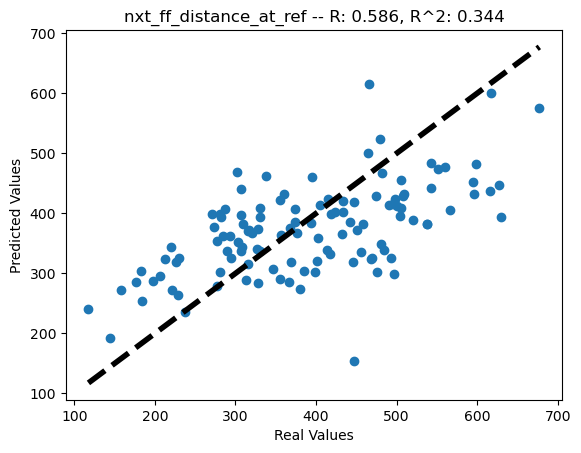

y_var_column: nxt_ff_angle_at_ref
Number of outliers dropped before train_test_split: 0 out of 582 samples.
R-squared:  0.8143
Adjusted R-squared:  0.8094
R-squared on test set: 0.7559


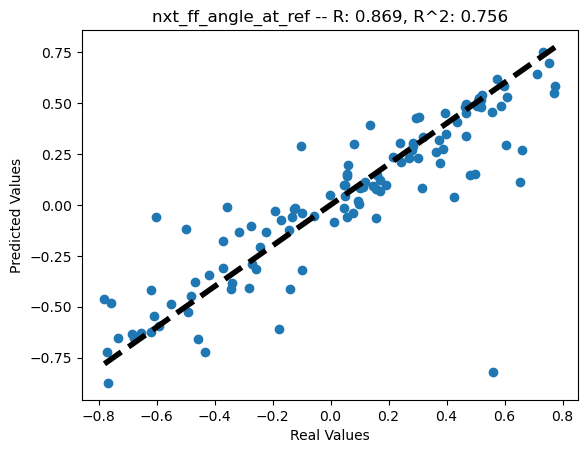

y_var_column: angle_from_m_before_stop_to_nxt_ff
Number of outliers dropped before train_test_split: 3 out of 582 samples.
R-squared:  0.6816
Adjusted R-squared:  0.6731
R-squared on test set: 0.7172


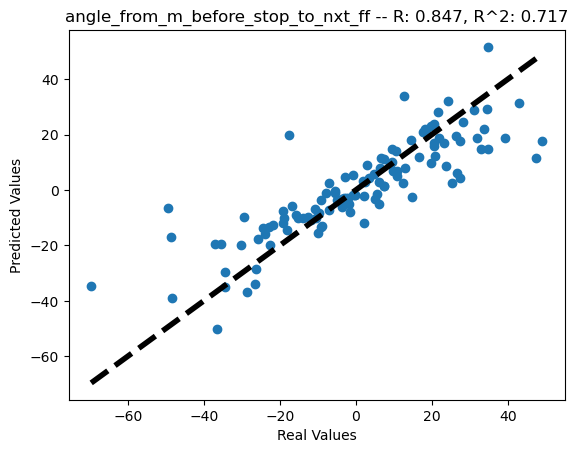

In [ ]:
plan_x_tc = pf.plan_x_tc[ref_columns + ['d_heading_of_traj'] + curv_columns].copy()
ml_inst = ml_methods_class.MlMethods()
pf.x_var_df, pf.y_var_df = prep_ml_data_utils.make_x_and_y_var_df(plan_x_tc, pf.plan_y_tc, drop_na=True, scale_x_var=True)
for y_var_column in ['nxt_ff_distance_at_ref',
                        'nxt_ff_angle_at_ref',
                        'angle_from_m_before_stop_to_nxt_ff']:
    if y_var_column not in pf.y_var_df.columns:
        continue
    print('y_var_column:', y_var_column)
    ml_inst.split_and_use_linear_regression(pf.x_var_df, pf.y_var_df, y_var_column=y_var_column)


In [ ]:
stop!

#### specific columns

In [43]:
specific_columns = [
'closer_to_cur_ff_than_nxt_ff_last_disp_earliest_vis_time',
'closer_to_cur_ff_than_nxt_ff_rightmost_latest_vis_time',
'within_n_cm_to_stop_longest_vis_ff_angle',
'nxt_ff_angle_when_nxt_ff_first_seen',
# 'nxt_ff_distance_when_nxt_ff_first_seen',
'cur_ff_angle_when_cur_ff_first_seen',
'cur_ff_distance_when_cur_ff_first_seen',
'traj_curv_when_cur_ff_first_seen',
# 'nxt_ff_angle_when_nxt_ff_last_seen',
# 'traj_curv_when_nxt_ff_last_seen',
'traj_curv_when_cur_ff_last_seen'
]

In [44]:
test_or_control = 'control'

In [48]:
pf.plan_y_test.columns

Index(['Unnamed: 0_x', 'stop_point_index', 'stop_x', 'stop_y', 'stop_time',
       'cur_ff_index', 'cur_ff_x', 'cur_ff_y', 'cur_ff_cluster_50_size',
       'point_index_before_stop', 'monkey_angle_before_stop',
       'next_stop_point_index', 'next_stop_time',
       'cum_distance_between_two_stops', 'nxt_ff_index', 'nxt_ff_x',
       'nxt_ff_y', 'NXT_time_ff_last_seen_bbas', 'NXT_time_ff_last_seen_bsans',
       'nxt_ff_last_flash_time_bbas', 'nxt_ff_last_flash_time_bsans',
       'nxt_ff_cluster_last_seen_time_bbas',
       'nxt_ff_cluster_last_seen_time_bsans',
       'nxt_ff_cluster_last_flash_time_bbas',
       'nxt_ff_cluster_last_flash_time_bsans', 'mx_before_stop',
       'my_before_stop', 'cur_arc_end_heading', 'nxt_arc_end_heading',
       'cur_arc_end_x', 'cur_arc_end_y', 'd_heading_of_traj',
       'cur_d_heading_of_arc', 'ref_monkey_angle', 'ref_curv_of_traj',
       'nxt_d_heading_of_arc', 'angle_from_m_before_stop_to_cur_ff',
       'angle_from_m_before_stop_to_nxt_ff',


In [50]:
y_var_column = ''

'nxt_ff_angle_at_stop'

Number of outliers dropped before train_test_split: 1 out of 223 samples.
R-squared:  0.2871
Adjusted R-squared:  0.283
R-squared on test set: 0.1717


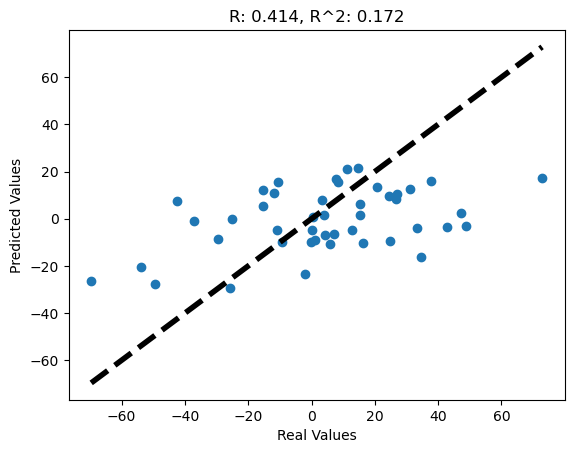

,index,p_value,Coefficient,Std Err,t,abs_coeff,rank_by_abs_coeff
0,nxt_ff_angle_at_ref,0.00000,13.21503,1.57410,8.39531,13.21503,1


In [ ]:
y_var_column = 'angle_from_m_before_stop_to_nxt_ff'

#pf.use_lr_on_all(test_or_control=test_or_control, y_var_column=y_var_column)
pf.use_lr_on_specific_x_columns(test_or_control=test_or_control, y_var_column=y_var_column,
                              specific_x_columns=['nxt_ff_angle_at_ref'])
pf.summary_df

Number of outliers dropped before train_test_split: 1 out of 223 samples.
R-squared:  0.8085
Adjusted R-squared:  0.8063
R-squared on test set: 0.879


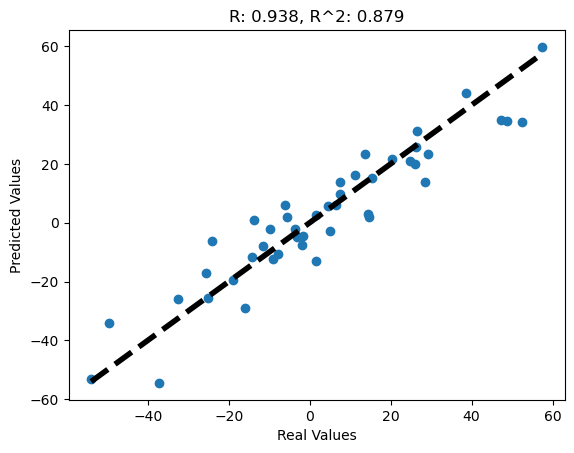

,index,p_value,Coefficient,Std Err,t,abs_coeff,rank_by_abs_coeff
0,nxt_ff_angle_at_ref,0.00000,30.18144,1.14195,26.42966,30.18144,1
1,cur_ff_angle_at_ref,0.00000,-25.93332,1.16554,-22.25004,25.93332,2


In [55]:
y_var_column = 'angle_from_m_before_stop_to_nxt_ff'

#pf.use_lr_on_all(test_or_control=test_or_control, y_var_column=y_var_column)
pf.use_lr_on_specific_x_columns(test_or_control=test_or_control, y_var_column=y_var_column,
                              specific_x_columns=['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref'])
pf.summary_df

In [ ]:
pf.summary_df.shape

#### convert continous var to dummy

In [ ]:
_run_lr(y_var_column)

Number of outliers dropped before train_test_split: 3 out of 582 samples.
R-squared:  0.9807
Adjusted R-squared:  0.9496
R-squared on test set: 0.8358


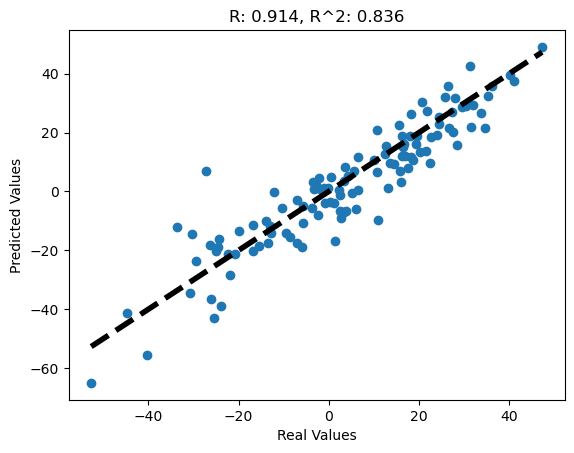

value: -1.0


KeyError: 'dummy'

In [ ]:
for value in np.arange(-1, -0.6, 0.05):
    pf.plan_x_tc['dummy'] = 0
    pf.plan_x_tc.loc[pf.plan_x_tc['nxt_ff_cluster_100_combd_latest_vis_rel_time'].between(value, 0), 'dummy'] = 1
    
    pf._run_lr(y_var_column, x_var_df=pf.plan_x_tc, y_var_df=pf.plan_y_tc)
    print('===================================')
    print('===================================')
    print('value:', value)
    print(pf.summary_df.loc['dummy'])
    print('===================================')
    print('===================================')

In [70]:
pf.summary_df

,index,p_value,Coefficient,Std Err,t,abs_coeff,rank_by_abs_coeff
0,nxt_ff_cluster_100_combd_max_angle_diff_boundary,0.04214,176.18578,86.07039,2.04700,176.18578,1
1,nxt_ff_cluster_100_LEFTMOST_angle_diff_boundary,0.01389,-112.75913,45.38014,-2.48477,112.75913,2
2,nxt_ff_cluster_100_LEFTMOST_ff_angle_boundary,0.01294,76.75473,30.57081,2.51072,76.75473,3
3,nxt_ff_angle_at_ref,0.00000,75.53443,9.22564,8.18745,75.53443,4
4,d_heading_of_traj,0.00000,-40.45582,2.96783,-13.63146,40.45582,5
5,nxt_ff_cluster_100_LEFTMOST_ff_angle,0.01860,-36.00440,15.15785,-2.37530,36.00440,6
6,nxt_ff_cluster_100_combd_max_ff_angle,0.01860,-36.00440,15.15785,-2.37530,36.00440,7
7,nxt_ff_cluster_100_LATEST_VIS_ff_angle,0.03372,30.83152,14.40721,2.14001,30.83152,8
8,cur_ff_cluster_100_LEFTMOST_ff_angle_boundary,0.03869,20.72484,9.94967,2.08297,20.72484,9
9,cur_ff_cluster_100_LEFTMOST_vis_duration,0.02208,-15.88813,6.87987,-2.30937,15.88813,10


In [61]:
pf.plan_x_tc.columns.values

array(['cur_ff_cluster_100_EARLIEST_VIS_ff_distance',
       'cur_ff_cluster_100_EARLIEST_VIS_ff_angle',
       'cur_ff_cluster_100_EARLIEST_VIS_ff_angle_boundary',
       'cur_ff_cluster_100_EARLIEST_VIS_angle_diff_boundary',
       'cur_ff_cluster_100_EARLIEST_VIS_earliest_vis_rel_time',
       'cur_ff_cluster_100_EARLIEST_VIS_latest_vis_rel_time',
       'cur_ff_cluster_100_EARLIEST_VIS_vis_duration',
       'cur_ff_cluster_100_LATEST_VIS_ff_distance',
       'cur_ff_cluster_100_LATEST_VIS_ff_angle',
       'cur_ff_cluster_100_LATEST_VIS_ff_angle_boundary',
       'cur_ff_cluster_100_LATEST_VIS_angle_diff_boundary',
       'cur_ff_cluster_100_LATEST_VIS_earliest_vis_rel_time',
       'cur_ff_cluster_100_LATEST_VIS_latest_vis_rel_time',
       'cur_ff_cluster_100_LATEST_VIS_vis_duration',
       'cur_ff_cluster_100_LEFTMOST_ff_distance',
       'cur_ff_cluster_100_LEFTMOST_ff_angle',
       'cur_ff_cluster_100_LEFTMOST_ff_angle_boundary',
       'cur_ff_cluster_100_LEFTMOST_angle_dif

In [ ]:
pf.plan_x_tc['dummy'] = 0
pf.plan_x_tc.loc[pf.plan_x_tc['nxt_ff_cluster_100_combd_latest_vis_rel_time'].between(-1, 0), 'dummy'] = 1
pf.plan_x_tc['dummy'] = 0
pf.plan_x_tc.loc[pf.plan_x_tc['nxt_ff_cluster_100_combd_latest_vis_rel_time']<0, 'dummy'] = 1

## do left and right have the same same-side ratio for test and control?

In [ ]:
len(ps.plan_xy_ctrl[ps.plan_xy_ctrl['dir_from_cur_ff_to_stop'] == 1])/len(ps.plan_xy_ctrl)

In [ ]:
len(ps.plan_xy_test[ps.plan_xy_test['dir_from_cur_ff_to_stop'] == 1])/len(ps.plan_xy_test)

In [ ]:
len(ps.plan_xy_ctrl[ps.plan_xy_ctrl['dir_from_cur_ff_same_side'] == 1])/len(ps.plan_xy_ctrl)

In [ ]:
len(ps.plan_xy_test[ps.plan_xy_test['dir_from_cur_ff_same_side'] == 1])/len(ps.plan_xy_test)

### CCA

In [ ]:
# Define data and scaler
from sklearn.cross_decomposition import CCA

scaler = StandardScaler()
X1 = pf.plan_x_tc[x_columns + cur_ff_cluster_columns]
X2 = pf.plan_y_tc[['nxt_ff_distance_at_ref',
                        'nxt_ff_angle_at_ref', 
                        'nxt_ff_angle_at_stop']].copy()

#X2 = osf.only_cur_ff_df[['d_heading_of_traj']].copy()

for column in ['data_name', 'stop_point_index']:
    if column in X1.columns:
        X1.drop(columns=[column], inplace=True)


avg_x_loadings, avg_y_loadings, avg_canon_corrs = cca_utils.run_cca(X1, X2, n_comp=2, n_splits=5, show_plots=False)

cca_plotting.plot_x_loadings(avg_x_loadings, avg_canon_corrs, X1)



### PCA

In [ ]:
pf.use_lr_on_all(test_or_control=None, y_var_column=y_var_column, use_pca=True)
pf.summary_df.head(10)

In [ ]:
# Create a DataFrame of loadings
loadings = pf.pca.components_
feature_names = pf.original_x_var_df.columns
column_names = [f'x{i}' for i in range(loadings.shape[0])]
pca_loadings_df = pd.DataFrame(loadings.T, columns=column_names, index=feature_names)

In [ ]:
# show explained variance

sorted_result = pf.summary_df[pf.summary_df['p_value'] <= 0.05].sort_values(by='Coefficient', ascending=False).copy()
for i in range(10):
    print('i:', i)
    sorted_result_row = sorted_result.iloc[i]
    pca_x = sorted_result_row.name
    if pca_x == 'const':
        continue
    #column = pca_loadings_df.columns[i]
    print('pca_x:', pca_x)
    print('sorted_result_row:', sorted_result_row)
    print(pca_loadings_df[pca_x].sort_values(ascending=False).head(50))
    #print(df_loadings[column].sort_values(ascending=False).tail(5))

In [ ]:
pf.summary_df[pf.summary_df['p_value'] <= 0.05].sort_values(by='Coefficient', ascending=False)

In [ ]:
specific_columns = [column for column in pf.summary_df.index if 'nxt_ff_cluster_100' in column]

In [ ]:
pf.summary_df.loc('cur_ff_cluster_100_combd_latest_vis_time_before_stop')

In [ ]:
pf.summary_df.head(50)

In [ ]:
pf.plan_x_tc['whether_test']

In [ ]:
pf.summary_df.loc['dummy'] # both

In [ ]:
features = [column for column in pf.summary_df.index if 'latest_vis_time_before_stop' in column]

In [ ]:
pf.summary_df.loc[features] # control

In [ ]:
pf.plan_x_tc[pf.plan_x_tc['nxt_ff_cluster_100_combd_latest_vis_rel_time'].between(-1, 0)]

In [ ]:
sns.histplot(pf.plan_x_tc['nxt_ff_cluster_100_combd_latest_vis_rel_time'], binrange=(-5, 5))
plt.show()

In [ ]:
pf.summary_df.loc['nxt_ff_cluster_100_combd_latest_vis_rel_time'] # test

## non-linearity

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train and y_train are your features and target variable
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(pf.x_var_df)

# Convert to DataFrame for better handling
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())


In [ ]:
pf.x_var_df = X_poly_df.copy()

In [ ]:
pf.y_var_df.reset_index(drop=True, inplace=True)

In [ ]:
ml_inst = ml_methods_class.MlMethods()
ml_inst.split_and_use_linear_regression(y_var_name=y_var_column)

In [ ]:
ml_inst.summary_df

In [ ]:
ml_inst.summary_df_all

## vif

In [ ]:
pd.set_option('display.max_colwidth', None)

NameError: name 'ml_inst' is not defined

In [ ]:
pf.vif_df[pf.vif_df['feature']=='dummy']

In [ ]:
pf.vif_df.iloc[:30]

## heatmap

In [ ]:
specific_columns = [column for column in pf.vif_df['feature'].values if 'ff_angle' in column]

In [ ]:
specific_columns = [column for column in pf.vif_df['feature'].values if 'better_angle_than_nxt_ff' in column]

In [ ]:
specific_columns = [column for column in pf.vif_df['feature'].values if 'cur_ff_cluster_100' in column]


In [ ]:
ml_inst.show_correlation_heatmap(specific_columns=None)

## neural network

In [ ]:
ml_inst.use_neural_network()

# Data summary

In [ ]:
heading_info_df = ps.test_heading_info_df.copy()

In [ ]:
heading_info_df = ps.ctrl_heading_info_df.copy()

In [ ]:
heading_info_df[['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'd_heading_of_traj', 'cur_d_heading_of_arc']] = heading_info_df[['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'd_heading_of_traj', 'cur_d_heading_of_arc']]*180/math.pi

In [ ]:
(pf.plan_x_tc[['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref']]*180/math.pi).describe()

### Diff vs diff in abs

In [ ]:
sns.histplot(pf.plan_y_tc['diff_in_d_heading'], color='blue', alpha=0.4, binrange=(-75, 75))
sns.histplot(pf.plan_y_tc['diff_in_abs_d_heading'], color='orange', alpha=0.4, binrange=(-75, 75))
plt.show()

### take out nxt ff angle to the right at ref

In [ ]:
plan_x_tc = pf.plan_x_tc.copy()
plan_y_tc = pf.plan_y_tc.copy()
plan_x_tc['unique_id'] = np.arange(len(plan_x_tc))
plan_y_tc['unique_id'] = np.arange(len(plan_x_tc))

In [ ]:
plan_x_sub = plan_x_tc[plan_x_tc['nxt_ff_angle_at_ref'] < 0].copy().sort_values(by='unique_id')
plan_y_sub = plan_y_tc[plan_y_tc['unique_id'].isin(plan_x_sub['unique_id'])].sort_values(by='unique_id')

In [ ]:
pf.plan_x_tc.shape

In [ ]:
plan_x_sub.shape

In [ ]:
(plan_y_sub[['diff_in_d_heading', 'diff_in_abs_d_heading']]).describe()

In [ ]:
heading_sub = heading_info_df[heading_info_df['nxt_ff_angle_at_ref'] < 0].copy()

In [ ]:
# control
heading_sub[['diff_in_d_heading', 'diff_in_abs_d_heading', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_m_before_stop_to_nxt_ff', 'angle_from_cur_ff_landing_to_nxt_ff']].describe()

In [ ]:
# test
heading_sub[['diff_in_d_heading', 'diff_in_abs_d_heading', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_m_before_stop_to_nxt_ff', 'angle_from_cur_ff_landing_to_nxt_ff']].describe()

In [ ]:
# control
heading_info_df[['diff_in_d_heading', 'diff_in_abs_d_heading', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_m_before_stop_to_nxt_ff', 'angle_from_cur_ff_landing_to_nxt_ff']].describe()

In [ ]:
# test
heading_info_df[['diff_in_d_heading', 'diff_in_abs_d_heading', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_m_before_stop_to_nxt_ff', 'angle_from_cur_ff_landing_to_nxt_ff']].describe()

In [ ]:
heading_sub2 = heading_info_df[heading_info_df['nxt_ff_angle_at_ref'] > 0].copy()

In [ ]:
# control
heading_sub2[['diff_in_d_heading', 'diff_in_abs_d_heading', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_m_before_stop_to_nxt_ff', 'angle_from_cur_ff_landing_to_nxt_ff']].describe()

In [ ]:
# test
heading_sub2[['diff_in_d_heading', 'diff_in_abs_d_heading', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_m_before_stop_to_nxt_ff', 'angle_from_cur_ff_landing_to_nxt_ff']].describe()

## histplot of ratios/diff

In [ ]:
# pf.make_plan_y_tc(already_made_ok=True)

In [ ]:
sns.histplot(pf.plan_y_test['ratio'], bins=100, binrange=(-20, 20), stat='probability')
sns.histplot(pf.plan_y_ctrl['ratio'], bins=100, binrange=(-20, 20), stat='probability')
plt.show()

In [ ]:
binrange = (-80, 80)
sns.histplot(pf.plan_y_test['diff_in_abs_d_heading'], bins=100, stat='probability', binrange=binrange, alpha=0.5, color='blue')
sns.histplot(pf.plan_y_ctrl['diff_in_abs_d_heading'], bins=100, stat='probability', binrange=binrange, alpha=0.5, color='orange')
plt.show()

In [ ]:
sns.histplot(pf.plan_y_test['ratio'], bins=100, binrange=(-20, 20), stat='probability')
sns.histplot(pf.plan_y_ctrl['ratio'], bins=100, binrange=(-20, 20), stat='probability')
plt.show()

In [ ]:
binrange = (-80, 80)
sns.histplot(pf.plan_y_test['diff_in_abs_d_heading'], bins=100, stat='probability', binrange=binrange, alpha=0.5)
sns.histplot(pf.plan_y_ctrl['diff_in_abs_d_heading'], bins=100, stat='probability', binrange=binrange, alpha=0.5)
plt.show()

## histplot of clusters

In [ ]:
for var in ['num_closer_than_nxt_ff_to_stop', 'num_ff_visible_later_than_nxt_ff_before_stop',
            'num_ff_within_n_cm_to_stop', 'nxt_ff_cluster_size',
            'cur_ff_cluster_size']:
    sns.histplot(pf.plan_x_test[var], binwidth=1, binrange=(-0.5, math.ceil(max(pf.plan_x_test[var])+0.5 )))
    plt.title(var)
    plt.show()
    

## barplots of ratios/diff

In [ ]:
sns.boxplot(pf.plan_y_tc, x='whether_test', y='diff_in_abs_d_heading')
plt.ylim(-80, 80)
plt.show()

In [ ]:
sns.boxplot(pf.plan_y_tc, x='whether_test', y='ratio')
#sns.boxplot(pf.plan_y_ctrl['ratio'])
plt.ylim(-5, 5)
plt.show()

In [ ]:

ratio_stat = pd.concat([pf.plan_y_test['ratio'].describe(), pf.plan_y_ctrl['ratio'].describe()], axis=1)
ratio_stat.columns = ['test_ratio', 'ctrl_ratio']
diff_stat = pd.concat([pf.plan_y_test['diff_in_abs_d_heading'].describe(), pf.plan_y_ctrl['diff_in_abs_d_heading'].describe()], axis=1)
diff_stat.columns = ['test_diff_in_abs_d_heading', 'ctrl_diff_in_abs_d_heading']
all_stat = pd.concat([ratio_stat, diff_stat], axis=1)
all_stat

In [ ]:
all_stat.iloc[3:, :2]

## polar plot

In [ ]:
gc.collect()

In [ ]:
pf.compare_test_and_control_in_plotly_polar_plots(max_instances_each=50, start='stop_point_index', end='next_stop_point_index')

## histplot of ff angle at ref

In [ ]:
pf.get_stops_near_ff_df(test_or_control='ctrl')
both_ff_at_ref_df_ctrl = pf.get_both_ff_at_ref_df()
nxt_ff_at_stop_df_ctrl = pf.get_nxt_ff_at_stop_df()

In [ ]:
pf.get_stops_near_ff_df(test_or_control='test')
pf._find_nxt_ff_df_2_and_cur_ff_df_2_based_on_specific_point_index(all_point_index=pf.cur_ff_df['point_index_ff_first_seen'].values)
both_ff_at_ref_df_test = pf.get_both_ff_at_ref_df().copy()
nxt_ff_at_stop_df_test = pf.get_nxt_ff_at_stop_df().copy()
test_df = pd.concat([both_ff_at_ref_df_test, nxt_ff_at_stop_df_test], axis=1)

In [ ]:

pf.get_stops_near_ff_df(test_or_control='control')
pf._find_nxt_ff_df_2_and_cur_ff_df_2_based_on_specific_point_index(all_point_index=pf.cur_ff_df['point_index_ff_first_seen'].values)
both_ff_at_ref_df_ctrl = pf.get_both_ff_at_ref_df().copy()
nxt_ff_at_stop_df_ctrl = pf.get_nxt_ff_at_stop_df().copy()
ctrl_df = pd.concat([both_ff_at_ref_df_ctrl, nxt_ff_at_stop_df_ctrl], axis=1)

In [ ]:
sns.histplot(pf.plan_x_test['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5)
sns.histplot(pf.plan_x_ctrl['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5)
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.25, alpha=0.5)
sns.histplot(ctrl_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.27, alpha=0.5)
plt.show()

In [ ]:
sns.histplot(test_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.25, alpha=0.5)
sns.histplot(ctrl_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.27, alpha=0.5)
plt.show()

In [ ]:
sns.histplot(test_df['cur_ff_distance_at_ref'], stat='probability', binwidth=20, alpha=0.5)
sns.histplot(ctrl_df['cur_ff_distance_at_ref'], stat='probability', binwidth=21, alpha=0.5)
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_distance_at_stop'], stat='probability', binwidth=20, alpha=0.5)
sns.histplot(ctrl_df['nxt_ff_distance_at_stop'], stat='probability', binwidth=21, alpha=0.5)
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=20)
sns.histplot(ctrl_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=20)
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_angle_at_stop'], stat='probability', binwidth=0.25, alpha=0.5)
sns.histplot(ctrl_df['nxt_ff_angle_at_stop'], stat='probability', binwidth=0.27, alpha=0.5)
plt.show()

In [ ]:
stop!

# Remake heading_info_df

In [ ]:
ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1

In [9]:
ref_point_mode = 'distance'
ref_point_value = -100

In [ ]:
gc.collect()

In [ ]:
# ref_point_mode = 'distance'
# ref_point_value = -150

ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1
monkey_name='monkey_Schro'

ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
sp = show_planning_class.ShowPlanning(monkey_name=monkey_name)
ps.test_heading_info_df, ps.ctrl_heading_info_df = sp.make_or_retrieve_combd_heading_df_x_sessions_from_both_test_and_control(ref_point_mode, ref_point_value, combd_heading_df_x_sessions_exists_ok=True,
                                                                show_printed_output=True, heading_info_df_exists_ok=True,
                                                                stops_near_ff_df_exists_ok=False)

ps.process_both_heading_info_df()     


#column_for_split = 'nxt_ff_last_flash_time_bbas'
#column_for_split = 'nxt_ff_cluster_last_flash_time_bbas'
#column_for_split = 'NXT_time_ff_last_seen_bbas'
column_for_split = 'nxt_ff_cluster_last_seen_time_bbas'
test_and_ctrl_heading_info_df = pd.concat([ps.test_heading_info_df, ps.ctrl_heading_info_df[ps.test_heading_info_df.columns]], axis=0)
ps.ctrl_heading_info_df = test_and_ctrl_heading_info_df[test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()
ps.test_heading_info_df = test_and_ctrl_heading_info_df[~test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()



ps.filter_both_heading_info_df(max_curv_range=150)
test_df = ps.test_heading_info_df.copy()
ctrl_df = ps.ctrl_heading_info_df.copy()
diff_and_ratio_stat_df = show_planning_utils.make_diff_and_ratio_stat_df(test_df, ctrl_df)
print(diff_and_ratio_stat_df)

## compare distributions

In [ ]:
sns.histplot(test_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='blue')
sns.histplot(ctrl_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='green')
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='blue')
sns.histplot(ctrl_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='green')
plt.show()

In [ ]:
sns.histplot(test_df['next_stop_time']-test_df['stop_time'], stat='probability', binwidth=0.1, alpha=0.5, color='blue')
sns.histplot(ctrl_df['next_stop_time']-ctrl_df['stop_time'], stat='probability', binwidth=0.1, alpha=0.5, color='green')
plt.xlim([0, 10])
plt.show()

In [ ]:
sns.histplot(test_df['next_stop_point_index']-test_df['stop_point_index'], stat='probability', binwidth=10, alpha=0.5, color='blue')
sns.histplot(ctrl_df['next_stop_point_index']-ctrl_df['stop_point_index'], stat='probability', binwidth=10, alpha=0.5, color='green')
plt.xlim([0, 1000])
plt.show()

In [ ]:
sns.histplot(test_df['cum_distance_between_two_stops'], stat='probability', alpha=0.5, color='blue', binwidth=25)
sns.histplot(ctrl_df['cum_distance_between_two_stops'], stat='probability', alpha=0.5, color='green', binwidth=24)
plt.xlim([0, 700])
plt.show()

In [ ]:
len(test_df[~test_df['nxt_ff_cluster_last_flash_time_bbas'].isnull()])/len(test_df)

In [ ]:
len(ctrl_df[~ctrl_df['nxt_ff_cluster_last_flash_time_bbas'].isnull()])/len(ctrl_df)

In [ ]:
len(test_df[~test_df['nxt_ff_cluster_last_flash_time_bsans'].isnull()])/len(test_df)

In [ ]:
len(ctrl_df[~ctrl_df['nxt_ff_cluster_last_flash_time_bsans'].isnull()])/len(ctrl_df)

# Others

## check ff vs ff cluster

In [ ]:
ff_column = 'nxt_ff_last_seen_rel_time_bbas'
cluster_column = 'nxt_ff_cluster_last_seen_rel_time_bbas'
df = snf.shared_stops_near_ff_df

find_stops_near_ff_utils.check_ff_vs_cluster(df, ff_column, cluster_column)

In [ ]:
ff_column = 'NXT_time_ff_last_seen_bbas'
cluster_column = 'nxt_ff_last_flash_time_bbas'
df = snf.shared_stops_near_ff_df

find_stops_near_ff_utils.check_ff_vs_cluster(df, ff_column, cluster_column)

In [ ]:
ff_column = 'nxt_ff_cluster_last_seen_time_bbas'
cluster_column = 'nxt_ff_cluster_last_flash_time_bbas'
df = snf.shared_stops_near_ff_df

find_stops_near_ff_utils.check_ff_vs_cluster(df, ff_column, cluster_column)

In [ ]:
len_subset = len(df[(df[ff_column].isnull()) & (~df[cluster_column].isnull())])
print(f'There are {len_subset} rows where {ff_column} is null but {cluster_column} is not null out of {len(df)} rows')

In [ ]:
df = test_and_ctrl_heading_info_df
df[(df[ff_column].isnull()) & (~df[cluster_column].isnull())][['nxt_ff_distance_at_ref', 'nxt_ff_angle_at_ref']].describe()

In [ ]:
df[['nxt_ff_distance_at_ref', 'nxt_ff_angle_at_ref']].describe()

In [ ]:
512/11235

## see traj_curv

In [ ]:
gc.collect()

In [ ]:
current_index = 2

In [ ]:
for index, row in dc.stops_near_ff_df_counted.iterrows():
    if index > current_index:
        current_index += 1
    else:
        continue
    dc.stops_near_ff_row = row
    dc.stop_point_index = row.stop_point_index
    dc._prepare_to_make_plotly_fig_for_dash_given_stop_point_index(dc.stop_point_index)
    dc._further_prepare_plotting_info_for_the_duration()
    dc.fig = dc._produce_fig_for_dash()
    dc.fig.show()

    duration = [row['stop_time'], row['next_stop_time']]
    curv_sub = dc.curv_of_traj_df[dc.curv_of_traj_df['time'].between(*duration)].copy()
    plt.scatter(curv_sub['time'], curv_sub['curv_of_traj'] * 180/math.pi)
    plt.show()

    if index == current_index + 10:
        break

## Experiment on evening out angles

In [ ]:
ref_point_mode = 'distance'
ref_point_value = -150
monkey_name = 'monkey_Bruno'

ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
sp = show_planning_class.ShowPlanning(monkey_name=monkey_name)
ps.test_heading_info_df, ps.ctrl_heading_info_df = sp.make_or_retrieve_combd_heading_df_x_sessions_from_both_test_and_control(ref_point_mode, ref_point_value, combd_heading_df_x_sessions_exists_ok=True,
                                                                show_printed_output=True, heading_info_df_exists_ok=False,
                                                                stops_near_ff_df_exists_ok=False)
ps.process_both_heading_info_df()

#column_for_split = 'nxt_ff_last_flash_time_bbas'
#column_for_split = 'nxt_ff_cluster_last_flash_time_bbas'
#column_for_split = 'NXT_time_ff_last_seen_bbas'
column_for_split = 'nxt_ff_cluster_last_seen_time_bbas'
test_and_ctrl_heading_info_df = pd.concat([ps.test_heading_info_df, ps.ctrl_heading_info_df[ps.test_heading_info_df.columns]], axis=0)
ps.ctrl_heading_info_df = test_and_ctrl_heading_info_df[test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()
ps.test_heading_info_df = test_and_ctrl_heading_info_df[~test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()



ps.filter_both_heading_info_df(max_curv_range=150)
test_df = ps.test_heading_info_df.copy()
ctrl_df = ps.ctrl_heading_info_df.copy()
diff_and_ratio_stat_df = show_planning_utils.make_diff_and_ratio_stat_df(test_df, ctrl_df)
print(diff_and_ratio_stat_df)

In [ ]:
ps.ctrl_heading_info_df.shape

In [ ]:
ps.ctrl_heading_info_df

In [ ]:


diff_and_ratio_stat_df = show_planning_utils.make_diff_and_ratio_stat_df(ps.test_heading_info_df, ps.ctrl_heading_info_df)
print(diff_and_ratio_stat_df)

In [ ]:
sns.histplot(ps.test_heading_info_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.1, alpha=0.5, color='blue')
sns.histplot(ps.ctrl_heading_info_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.1, alpha=0.5, color='orange')
plt.show()

In [ ]:
sns.histplot(ps.test_heading_info_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='blue')
sns.histplot(ps.ctrl_heading_info_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='orange')
plt.show()

In [ ]:
sns.histplot(ps.test_heading_info_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='blue')
sns.histplot(ps.ctrl_heading_info_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='orange')
plt.show()

In [ ]:
y1 = 'test_diff_in_abs_d_heading'
y2 = 'ctrl_diff_in_abs_d_heading'

# debug

In [ ]:
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0419"
pf = plan_factors_class.PlanFactors(raw_data_folder_path=raw_data_folder_path,
                                    optimal_arc_type = 'opt_arc_stop_first_vis_bdry')

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


KeyboardInterrupt: 

In [ ]:
pf.optimal_arc_type

In [ ]:
exists_ok = True
pf.make_plan_x_and_y_for_both_test_and_ctrl(plan_x_exists_ok=exists_ok, 
                                            plan_y_exists_ok=exists_ok,
                                            already_made_ok=exists_ok, 
                                            heading_info_df_exists_ok=exists_ok,
                                            ref_point_mode='time after cur ff visible', 
                                            ref_point_value=0.1,
                                            # ref_point_mode='distance', 
                                            # ref_point_value=-150,                                           
                                            )

In [ ]:
normal = pf.heading_info_df.copy()

In [ ]:
first = pf.heading_info_df.copy()

In [ ]:
normal

In [ ]:
pf.stops_near_ff_df.loc[pf.stops_near_ff_df['cur_ff_index'].idxmin(), 'cur_ff_index']

2

In [ ]:
opt_arc_stop_closest